## Final Exam STA208, S24:   due Tue, June 11, 2024

Name all the team members and provide a description of the contribution of the individual team mambers to this project.

- Name 1: Madhumitha Venkatesan

    - Contributions: Part 1, Part 2 (2.1 and 2.2), check other parts.


- Name 2: Fanling Liu

    - Contributions: Part 2 (2.3 and 2.4), check other parts.


- Name 3: Jieying Ma

    - Contributions: Part 2 (2.5), check other parts.



## Part 1: Methodology

1) Let $f_1,\ldots,f_K$ be densities on the real line, and let $\alpha_1,\ldots,\alpha_K$ be positive weights with $\sum_{i=1}^K \alpha_i= 1$. Define the mixture density

$$f_{\text{mix}}(x) = \alpha_1 f_1(x) + \cdots + \alpha_K f_K(x).$$

Suppose you know how to draw samples from the densities $f_i(x), i = 1,\ldots,K.$ Describe an algorithm for drawing samples from $f_{\text{mix}}(x).$


**Put answer to question 1) here:**

To draw samples from the mixture density $f_{\text{mix}}(x)$, we can use the following algorithm:


1. Draw a random variable $Z$ from a categorical distribution with probabilities $\alpha_1, \alpha_2, \ldots, \alpha_K$.
    - This means that, $\mathbb{P}(Z = i) = \alpha_i$ for $i = 1, 2, \ldots, K.$

2. Draw a sample from the chosen component: If $Z = i$, draw a sample $X$ from the density $f_i(x)$.

3. Return the sample: The sample $X$ is then a sample from the mixture density $f_{\text{mix}}(x)$.


The above steps can be implemented as follows:

1. Generate a uniform random variable $U$ in the interval $[0, 1]$.

2. Determine the component $Z$ such that,
    
    $$Z = i \quad \text{if} \quad \sum_{j=1}^{i-1} \alpha_j < U \leq \sum_{j=1}^i \alpha_j.$$
    
4. Draw a sample $X$ from the density $f_Z(x)$.


This algorithm ensures that the samples drawn from $f_{\text{mix}}(x)$ are appropriately weighted according to the mixture proportions $\alpha_1, \alpha_2, \ldots, \alpha_K$.


2) Consider a binary classification problem in ${\mathbb R}^2$ using Gaussian Naive Bayes. Recall that Gaussian Naive Bayes is using the assumption of normal marginal class densities.
    - Explain why the decision boundary is a quadratic function.
    - How does this generalize to multiclass classification.
   

**Put answer to question 2) here:**


In Gaussian Naive Bayes, we assume that the features are normally distributed within each class. For a binary classification problem, let the class-conditional densities be $( p(x|y=0)$ and $( p(x|y=1) )$, where $x\in\mathbb{R}^2 $

- The Gaussian distribution for each class can be written as:

   $$p(x|y=k) = \frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)$$

   where $ \mu_k $ is the mean vector and $ \Sigma_k $ is the covariance matrix for class $ k $.

<br>

  - The decision boundary is determined by the equality of the posterior probabilities:

   $$
   p(y=0|x) = p(y=1|x)
   $$

  - Using Bayes' theorem and the Gaussian densities, this can be written as:

   $$
   \frac{p(x|y=0) p(y=0)}{p(x)} = \frac{p(x|y=1) p(y=1)}{p(x)}
   $$

   Simplifying, we get:
   $$
   p(x|y=0) p(y=0) = p(x|y=1) p(y=1)
   $$


   Substituting the Gaussian distributions, we have:


   $$
   \frac{1}{(2\pi)^{d/2}|\Sigma_0|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu_0)^T \Sigma_0^{-1} (x - \mu_0)\right) p(y=0) = \frac{1}{(2\pi)^{d/2}|\Sigma_1|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu_1)^T \Sigma_1^{-1} (x - \mu_1)\right) p(y=1)
   $$
  

   - Taking the natural logarithm and simplifying, the decision boundary can be expressed as:

   $$
   (x - \mu_0)^T \Sigma_0^{-1} (x - \mu_0) - (x - \mu_1)^T \Sigma_1^{-1} (x - \mu_1) = \log\left(\frac{|\Sigma_1|}{|\Sigma_0|}\right) + 2 \log\left(\frac{p(y=1)}{p(y=0)}\right)
   $$

   where 
   $$
   \Sigma_0 = \begin{pmatrix}
   \sigma_{01}^2 & 0 \\
   0 & \sigma_{02}^2
   \end{pmatrix}
   $$

   $$
   \Sigma_1 = \begin{pmatrix}
   \sigma_{11}^2 & 0 \\
   0 & \sigma_{12}^2
   \end{pmatrix}
   $$
   
   - Expanding the quadratic forms, we get:

  $$
  \frac{(x_1 - \mu_{01})^2}{\sigma_{01}^2} + \frac{(x_2 - \mu_{02})^2}{\sigma_{02}^2} - \frac{(x_1 - \mu_{11})^2}{\sigma_{11}^2} - \frac{(x_2 - \mu_{12})^2}{\sigma_{12}^2} = \log\left(\frac{\sigma_{11}^2 \sigma_{12}^2}{\sigma_{01}^2 \sigma_{02}^2}\right) + 2 \log\left(\frac{p(y=1)}{p(y=0)}\right)
  $$

  <br>
   This equation represents a quadratic function in x, implying that the decision boundary is a quadratic function.

<br>

<p>



In multiclass classification with Gaussian Naive Bayes, we have more than two classes, say $ K $ classes. Each class $ y=k $ has its own Gaussian distribution with mean $ \mu_k $ and covariance $ \Sigma_k $.

- The class-conditional density for each class is given by:

<br>

  $$p(x|y=k) = \frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)$$


<br><br>

- The decision boundaries are determined by comparing the posterior probabilities for each pair of classes:
   $$
   p(y=k|x) = p(y=j|x)
   $$

- For each pair of classes \( k \) and \( j \), the decision boundary is given by:
<br>
   $$
   (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) - (x - \mu_j)^T \Sigma_j^{-1} (x - \mu_j) = \log\left(\frac{|\Sigma_j|}{|\Sigma_k|}\right) + 2 \log\left(\frac{p(y=j)}{p(y=k)}\right)
   $$

<p>Each pairwise comparison results in a quadratic decision boundary. Therefore, the overall decision boundaries in a multiclass setting are formed by the intersections of these pairwise quadratic boundaries. </p>

The resulting decision regions are determined by the maximum posterior probability among all classes:
   $$
   \hat{y} = \arg\max_{k} \; p(y=k|x)
   $$

  </p>

<p>
This means that in the multiclass case, the decision boundaries are still quadratic functions, but the final decision regions are more complex and are determined by the intersection of multiple quadratic surfaces.
</p>

## Part 2: Data analysis: instructions

Use the MNIST data to do the following:

 1) Fit the following classification algorithms to the (high-dimensional) MNIST data:
        
       - logistic regression (ovr)
       - linear SVM (ovr)
       - kernel SVM with rbf kernel (ovr) 
       - KNN 
     
     and 
     
       - compare their performance on the test set

 2) This part is about dimension reduction/visualization:
 
     - Visualize the MNIST training data in 2 dimensions using

        - PCA
        - t-SNE             
       
    - Use the KNN classification algorithm to cluster the embeddings and to cluster the original (high-dimensional) data; discuss the results.

 3) Since t-SNE (used above) has not been discussed in class, you are asked to learn about it (as part of this final project) and to describe what you have understood.

4) Data augmentation: Use the following bootstrap procedure to augment the MNIST data set by images that follow a similar distribution in the space of images. The basic idea is this:


    1.   consider the k-dimensional PCA embeddings as data (we think of k to be small, let's say $k \le 5$);
    3.   draw samples from a Gaussian KDE based on the embeddings;
    4.   use the samples from B. to reconstruct new images by using the first k eigenvectors and the k-dimensional samples from;

     
   To achieve this, proceed as follows:
      - recall Problem 1 from the Methodology part; this should help you with implementing a function "sample_gauss_KDE" that takes as input the number $N$ of samples to draw; the data and the bandwith for finding the KDE. The output of this function should be the N samples drawn from a distribution whose pdf is given by the KDE; (your function sample_gauss_KDE should work for data in any dimension);
      - apply sample_gauss_KDE to the k-dimensional PCA embeddings as input data
      - implement a function "image_reconst" that takes as input the number $k$ of summands to use in the "reconstruction", the corresponding k eigenfunctions (from running PCA on the MNIST data), and k samples from the KDE; the output is a new image; (note that while we are calling it a reconstruction, it only reconstructs an image in the data base if we use one of the observed points of the PCA embeddings; instead you are using embedding points with "some randomness added"... this is where the 'smooth bootstrap' enters.)
      
   Using the above approach, construct 9 new images and plot them in a figure using a 3 x 3 layout.
         
</br>         
         
**IMPORTANT:** You will get points for how you
- describe and interprete the outcomes of your analysis
- compare different methodologies;
- describe your rational or methods that went into choosing tuning parameters;
- discuss possible other insights you gained while working on this assignment (such as runtime; effects of choice of "random_state", etc.)

- if needed, **reduce the size of the data further** and describe what you did and why
- **add new cells to this notebook where needed** (either code cells, or text cells to add your comments/descriptions of your thoughts etc.)

### Importing the MNIST data

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import gridspec
from skimage.metrics import structural_similarity as ssim

#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**2.1** Plot figures 1-9 into a 3 x 3 grid of images

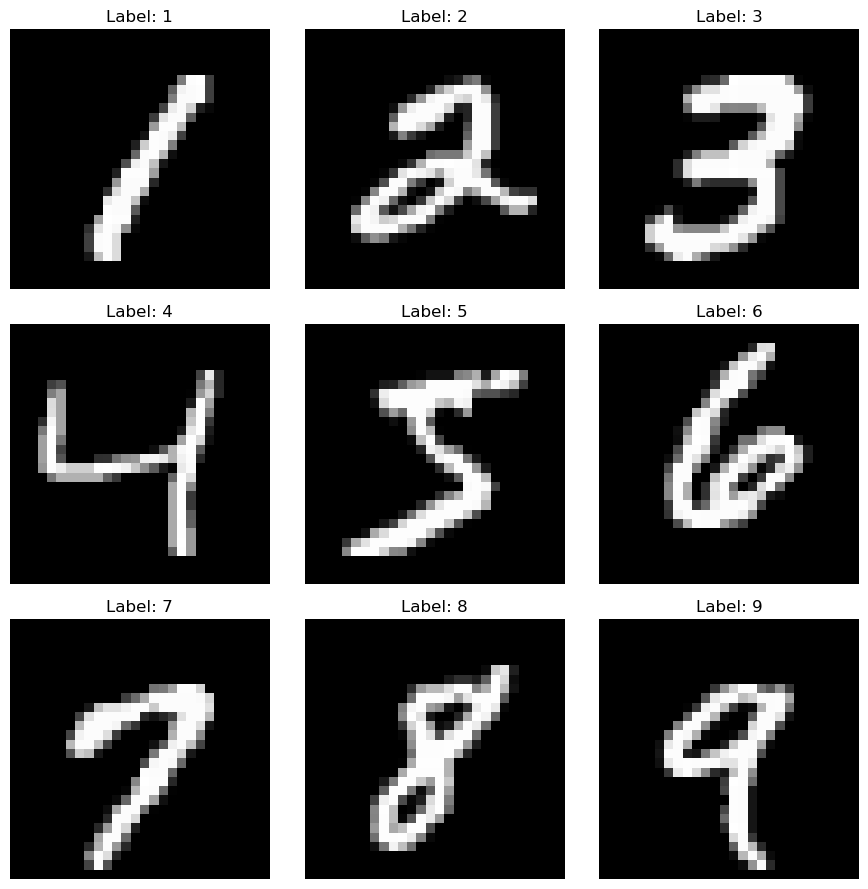

In [2]:
# Find the indices of digits 1-9
indices = []
for digit in range(1, 10):
    index = np.where(y_train == digit)[0][0]
    indices.append(index)

# Plot the digits
plt.figure(figsize=(9,9))
for i, index in enumerate(indices):
    plt.subplot(3, 3, i+1)  # 3x3 grid, position i+1
    plt.imshow(X_train[index], cmap='gray')
    plt.title(f'Label: {y_train[index]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

To make computations feasible, we reduce the size of the training data to 15,000, and we also normalize so that all the pixel values lie in [0,1].

In [3]:
X_tr = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])[0:15000,:]/255
X_te = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])/255

y_tr = y_train[0:15000]
y_te = y_test

**2.2 Determine the train-test split ratio:**

In [4]:
# Number of samples in the modified training set
num_train_samples = len(X_tr)

# Number of samples in the testing set
num_test_samples = len(X_te)

# Total number of samples
total_samples = num_train_samples + num_test_samples

# Calculate the ratios
train_ratio = num_train_samples / total_samples
test_ratio = num_test_samples / total_samples

# Print the ratios
print(f"Modified Training Data: {num_train_samples} samples ({train_ratio:.2%} of total)")
print(f"Testing Data: {num_test_samples} samples ({test_ratio:.2%} of total)")

Modified Training Data: 15000 samples (60.00% of total)
Testing Data: 10000 samples (40.00% of total)


**2.3 Classification of original data: Apply logistic regression, linear and kernel SVM and KNN classifiers and compare performance**

**2.3.1 Classification using multiclass logistic regression**

In [5]:
# Initialize the Logistic Regression classifier
lr_model = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='ovr', random_state=47)

# Fit the model on the training data
lr_train_start_time = time.time() # timing the training
lr_model.fit(X_tr, y_tr)
lr_train_end_time = time.time()
lr_train_time = lr_train_end_time - lr_train_start_time

# Predict on the test set
lr_test_start_time = time.time()
y_pred = lr_model.predict(X_te)
lr_test_end_time = time.time()
lr_test_time = lr_test_end_time - lr_test_start_time

# Calculate the accuracy of the model
accuracy_lr = accuracy_score(y_te, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X_tr, y_tr, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Accuracy of the logistic regression classifier: {accuracy_lr:.2%}")
print(f"Mean cross-validation score: {mean_cv_score:.2%}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.2%}")

print(f"Time taken to train the LogisticRegression model: {lr_train_time:.2f} seconds")
print(f"Time taken to test the LogisticRegression model: {lr_test_time:.2f} seconds")

Accuracy of the logistic regression classifier: 90.96%
Mean cross-validation score: 90.23%
Standard deviation of cross-validation scores: 1.20%
Time taken to train the LogisticRegression model: 4.05 seconds
Time taken to test the LogisticRegression model: 0.01 seconds


**Comment:** The accuracy of the logistic regression classifier is 90.96%.

In [6]:
# Tune the hyperparameters

# Initialize the logistic regression classifier
LR_model = LogisticRegression(max_iter=10000, multi_class='ovr')

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1,100,1000],  # Regularization strengths
}

# Setup the grid search
lr_grid_search = GridSearchCV(LR_model, param_grid, cv=5, scoring='accuracy', verbose=0)

lr_grid_start_time = time.time()
# Fit grid search to the data
lr_grid_search.fit(X_tr, y_tr)
lr_grid_end_time = time.time()

lr_grid_search_time_minutes = (lr_grid_end_time - lr_grid_start_time) / 60

# Print the best parameters and the best score
print(f"Best parameters: {lr_grid_search.best_params_}")
print(f"Best cross-validation score: {lr_grid_search.best_score_:.2%}")
print(f"Time taken for grid search: {lr_grid_search_time_minutes:.2f} minutes")

Best parameters: {'C': 1}
Best cross-validation score: 90.23%
Time taken for grid search: 2.04 minutes


__Conclusion:__

Best parameters: {'C': 1}

Best cross-validation score: 90.23%

Time taken for grid search: 2.04 minutes

**2.3.2 Classification using multiclass linear SVM**

In [7]:
# Initialize the Linear SVM classifier
svm_model = LinearSVC(max_iter=10000, dual=False, random_state=47)

# Fit the model on the training data
svm_train_start_time = time.time()  # timing the training
svm_model.fit(X_tr, y_tr)
svm_train_end_time = time.time()
svm_train_time = svm_train_end_time - svm_train_start_time

# Predict on the test set
svm_test_start_time = time.time()
y_pred_svm = svm_model.predict(X_te)
svm_test_end_time = time.time()
svm_test_time = svm_test_end_time - svm_test_start_time

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_tr, y_tr, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_te, y_pred_svm)

print(f"Accuracy of the multiclass linear SVM classifier: {accuracy_svm:.2%}")
print(f"Mean cross-validation score: {mean_cv_score:.2%}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.2%}")

print(f"Time taken to train the LinearSVC model: {svm_train_time:.2f} seconds")
print(f"Time taken to test the LinearSVC model: {svm_test_time:.2f} seconds")

Accuracy of the multiclass linear SVM classifier: 89.72%
Mean cross-validation score: 88.88%
Standard deviation of cross-validation scores: 1.14%
Time taken to train the LinearSVC model: 3.31 seconds
Time taken to test the LinearSVC model: 0.01 seconds


**Comment:** The accuracy of the multiclass linear SVM classifier is 89.72%.

In [8]:
# Tune the hyperparameters

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Regularization strengths
}

# Initialize the GridSearchCV object
svm_grid_search = GridSearchCV(LinearSVC(dual=False, max_iter=10000, multi_class='ovr', random_state=47), param_grid, cv=5, scoring='accuracy', verbose=0)

# Start timing the grid search
svm_grid_start_time = time.time()

# Fit grid search to the data
svm_grid_search.fit(X_tr, y_tr)

# End timing the grid search
svm_grid_end_time = time.time()

# Calculate the time taken for grid search in seconds
svm_grid_search_time_seconds = svm_grid_end_time - svm_grid_start_time

# Convert time to minutes
svm_grid_search_time_minutes = svm_grid_search_time_seconds / 60

# Print the best parameters and the best score
print(f"Best parameters: {svm_grid_search.best_params_}")
print(f"Best cross-validation score: {svm_grid_search.best_score_:.2%}")
print(f"Time taken for grid search: {svm_grid_search_time_minutes:.2f} minutes")

Best parameters: {'C': 0.01}
Best cross-validation score: 90.10%
Time taken for grid search: 4.73 minutes


__Conclusion:__

Best parameters: {'C': 0.01}

Best cross-validation score: 90.10%

Time taken for grid search: 4.73 minutes

**2.3.3 Classification using multiclass kernel SVM with rbf kernel**

In [9]:
# Initialize the SVC with the RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr', random_state=47)

# Fit the model on the training data
svm_rbf_train_start_time = time.time()
svm_rbf.fit(X_tr, y_tr)
svm_rbf_train_end_time = time.time()
svm_rbf_train_time = svm_rbf_train_end_time - svm_rbf_train_start_time

# Predict on the test set
svm_rbf_test_start_time = time.time()
y_pred_rbf = svm_rbf.predict(X_te)
svm_rbf_test_end_time = time.time()
svm_rbf_test_time = svm_rbf_test_end_time - svm_rbf_test_start_time

# Calculate the accuracy of the model
accuracy_rbf = accuracy_score(y_te, y_pred_rbf)

# Perform 5-fold cross-validation
cv_scores_rbf = cross_val_score(svm_rbf, X_tr, y_tr, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score_rbf = np.mean(cv_scores_rbf)
std_cv_score_rbf = np.std(cv_scores_rbf)

print(f"Accuracy of the multiclass kernel SVM (RBF) classifier: {accuracy_rbf:.2%}")
print(f"Mean cross-validation score: {mean_cv_score_rbf:.2%}")
print(f"Standard deviation of cross-validation scores: {std_cv_score_rbf:.2%}")
print(f"Time taken to train the SVM RBF model: {svm_rbf_train_time:.2f} seconds")
print(f"Time taken to test the SVM RBF model: {svm_rbf_test_time:.2f} seconds")

Accuracy of the multiclass kernel SVM (RBF) classifier: 96.67%
Mean cross-validation score: 96.41%
Standard deviation of cross-validation scores: 0.49%
Time taken to train the SVM RBF model: 14.78 seconds
Time taken to test the SVM RBF model: 14.50 seconds


**Comment:** The accuracy of the multiclass kernel SVM (RBF) classifier is 96.67%.

In [10]:
# Tune the hyperparameters

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization strengths
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]  # Gamma values
}

# Initialize the GridSearchCV object
svm_rbf_grid_search = GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid, cv=5, scoring='accuracy', verbose=0)

# Fit grid search to the data
svm_grid_start_time = time.time()
svm_rbf_grid_search.fit(X_tr, y_tr)
svm_grid_end_time = time.time()

svm_grid_search_time_minutes = (svm_grid_end_time - svm_grid_start_time) / 60

# Print the best parameters and the best score
print(f"Best parameters: {svm_rbf_grid_search.best_params_}")
print(f"Best cross-validation score: {svm_rbf_grid_search.best_score_:.2%}")
print(f"Time taken for grid search: {svm_grid_search_time_minutes:.2f} minutes")

Best parameters: {'C': 100, 'gamma': 'scale'}
Best cross-validation score: 97.03%
Time taken for grid search: 124.87 minutes


__Conclusion:__  
Best parameters: {'C': 100, 'gamma': 'scale'}  
Best cross-validation score: 97.03%  
Time taken for grid search: 124.87 minutes  
where gamma is set to 'scale', which uses the formula 1 / (n_features * X.var()) to compute the value of gamma.

**2.3.4 Classification using KNN classifier**

In [11]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_train_start_time = time.time()
knn.fit(X_tr, y_tr)
knn_train_end_time = time.time()
knn_train_time = knn_train_end_time - knn_train_start_time

# Predict on the test set
knn_test_start_time = time.time()
y_pred_knn = knn.predict(X_te)
knn_test_end_time = time.time()
knn_test_time = knn_test_end_time - knn_test_start_time

# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_te, y_pred_knn)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_tr, y_tr, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Accuracy of the KNN classifier: {accuracy_knn:.2%}")
print(f"Mean cross-validation score: {mean_cv_score:.2%}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.2%}")
print(f"Time taken to train the KNN model: {knn_train_time:.2f} seconds")
print(f"Time taken to test the KNN model: {knn_test_time:.2f} seconds")

Accuracy of the KNN classifier: 95.19%
Mean cross-validation score: 94.77%
Standard deviation of cross-validation scores: 0.42%
Time taken to train the KNN model: 0.00 seconds
Time taken to test the KNN model: 1.05 seconds


**Comment:** The accuracy of the KNN classifier is 95.19%.

In [12]:
# Tune the hyperparameters

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),  # Explore a range of values for n_neighbors
    'weights': ['uniform', 'distance'],  # Uniform weights or weighted by distance
    'metric': ['euclidean', 'manhattan']  # Explore different distance metrics
}

# Initialize the GridSearchCV object
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=0)

# Fit grid search to the data
knn_grid_start_time = time.time()
knn_grid_search.fit(X_tr, y_tr)
knn_grid_end_time = time.time()

# Convert time to minutes
knn_grid_search_time_minutes = (knn_grid_end_time - knn_grid_start_time) / 60

# Print the best parameters and the best score
print(f"Best parameters: {knn_grid_search.best_params_}")
print(f"Best cross-validation score: {knn_grid_search.best_score_:.2%}")
print(f"Time taken for grid search: {knn_grid_search_time_minutes:.2f} minutes")

Best parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 95.28%
Time taken for grid search: 20.19 minutes


__Conclusion:__  
Best parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}  
Best cross-validation score: 95.28%  
Time taken for grid search: 20.19 minutes

**Comparision of Accuracies of different Classifiers**

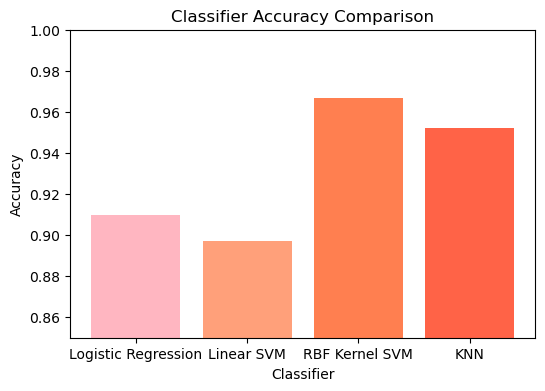

In [13]:
# Plot the results
plt.figure(figsize=(6, 4))
classifiers = ['Logistic Regression', 'Linear SVM', 'RBF Kernel SVM', 'KNN']
accuracies = [accuracy_lr, accuracy_svm, accuracy_rbf, accuracy_knn]
colors = ['#FFB6C1', '#FFA07A', '#FF7F50', '#FF6347']
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0.85, 1.0)
plt.show()

**Comment:** We can see that the accuracies of classifiers are RBF Kernel SVM > KNN > Logistic Regression > Linear SVM.

**2.3.5 Evaluating the performance of the classifiers using confusion matrices**

**Confusion Matrix for Logistic Regression Classifier**

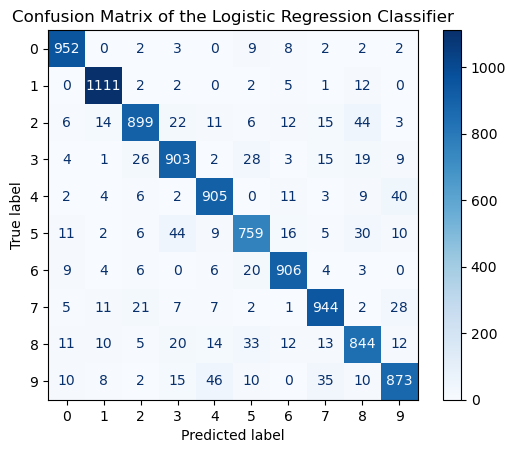

In [14]:
# Logistic Regression classifier
best_model = lr_grid_search.best_estimator_
y_pred = best_model.predict(X_te)

# Compute the confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of the Logistic Regression Classifier')
plt.show()

**Confusion Matrix for Linear SVM Classifier**

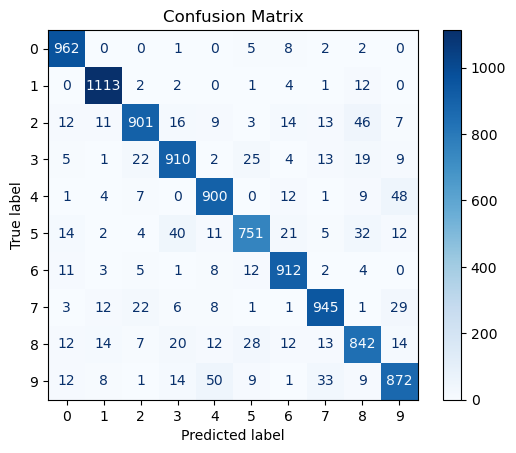

In [15]:
# Linear SVM classifier
# Predict on the test set using the best estimator
y_pred = svm_grid_search.best_estimator_.predict(X_te)

# Compute the confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid_search.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

**Confusion Matrix for Kernel SVM (RBF) Classifier**

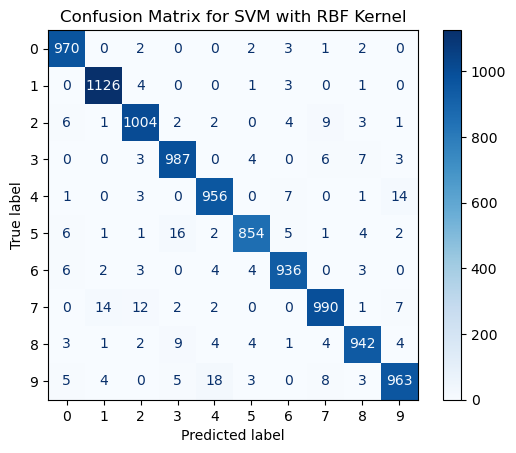

In [16]:
# Kernel SVM (RBF) classifier
# Predict on the test set using the best estimator
y_pred = svm_rbf_grid_search.best_estimator_.predict(X_te)

# Compute the confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf_grid_search.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM with RBF Kernel')
plt.show()

**Confusion Matrix for KNN Classifier**

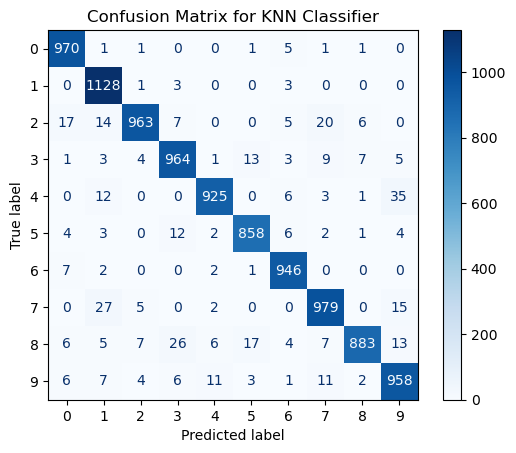

In [17]:
# KNN classifier
# Predict on the test set using the best estimator
y_pred = knn_grid_search.best_estimator_.predict(X_te)

# Compute the confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_grid_search.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

**Provide description of methods used (how did you choose tuning parameters) and give your thoughts about the performance of the methods and how they compare to each other:**


__1. Description of tuning parameters:__

In this study, we use GridSearchCV for tuning parameters, an exhaustive grid search method that explores specified parameter values for an estimator. We select parameters based on k-fold cross-validation accuracy, a widely used criterion in machine learning. The logic behind choosing the range for the grid search is to cover a broad spectrum of magnitudes likely to yield optimal parameters. If the best parameters are at the boundary of our initial range, we adjust the range around these parameters and conduct another grid search to ensure they are not limited by the initial range. Additionally, we consider computational costs to ensure the process remains efficient and manageable.

- logistic regression
The tuning parameters involve the regularization strength C and the solver used for optimization. The C parameter controls the inverse of regularization strength, with smaller values specifying stronger regularization. In this case, the grid search explored a range of C values from 0.001 to 1000 to find the best regularization strength. The solver parameter was set to lbfgs, a solver suitable for larger datasets and multinomial loss. GridSearchCV with 5-fold cross-validation was used to systematically search for the best combination of these parameters. The best parameters identified were C=0.1, achieving a cross-validation accuracy of 90.84%.

- Linear Support Vector Machine (SVM)
The key tuning parameter is C, which controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights. The dual=False parameter is used because the number of samples is greater than the number of features. The Linear SVM was fitted directly to the training data, and 5-fold cross-validation was performed to evaluate its performance. The best C parameter found was 0.01, with a cross-validation accuracy of 90.10%.

- RBF (Radial Basis Function) kernel SVM
This model involves tuning both the regularization parameter C and the kernel coefficient gamma. The C parameter controls the trade-off between the decision boundary smoothness and classification accuracy on the training data, while gamma defines the influence of a single training example. A higher gamma value leads to a model that captures more details in the training data but may lead to overfitting. GridSearchCV with 5-fold cross-validation was used to find the best parameters. The grid search considered values for C ranging from 0.1 to 100 and gamma values including 'scale', 'auto', and specific numbers like 0.01, 0.1, and 1. The best parameters found were C=100 and gamma='scale'(gamma set to 'scale' uses the formula 1 / (n_features * X.var()) to compute the value of gamma), resulting in a cross-validation accuracy of 97.03%.

- KNN
The tuning parameters include the number of neighbors (n_neighbors), the weight function used in prediction (weights), and the distance metric (metric). The number of neighbors determines the number of closest training samples in the feature space used for classification. The weights parameter can be either 'uniform' or 'distance', where 'uniform' gives equal weight to all points, and 'distance' gives more weight to closer neighbors. The metric parameter specifies the distance metric used to measure the distance between points, with common choices being euclidean and manhattan. GridSearchCV with 5-fold cross-validation was employed to explore these parameters. The best parameters identified were metric='euclidean', n_neighbors=4, and weights='distance', achieving a cross-validation accuracy of 95.28%.

__2. Comparison of Results and Performance:__

**Testing Set Accuracy**

Among the methods tested, the RBF Kernel SVM achieved the highest accuracy at 96.67%, followed by K-Nearest Neighbors (KNN) with 95.19%. Logistic Regression came next with an accuracy of 90.96%, and Linear SVM had the lowest accuracy among the four methods at 89.72%.

**Cross-Validation Accuracy**

For cross-validation accuracy, the RBF Kernel SVM again led with 97.03%, followed by K-Nearest Neighbors (KNN) at 95.28%. Logistic Regression had an accuracy of 90.84%, and Linear SVM had the lowest cross-validation accuracy at 90.1%.

**Confusion Matrices Analysis**

The confusion matrix for the Logistic Regression classifier shows that while it performs well overall, there are noticeable misclassifications, particularly between similar digits such as 3 and 5, and 7 and 9. This indicates that while the model captures the general patterns, it struggles with finer distinctions between certain digits.

In comparison, the Linear SVM classifier exhibits similar performance to Logistic Regression, with slightly more misclassifications in certain areas. For instance, there are more errors between digits like 5 and 3, and 8 and 9, suggesting that the linear decision boundary may not be capturing all the necessary complexities in the data.

The RBF Kernel SVM classifier demonstrates the highest accuracy among all models, with significantly fewer misclassifications across most digit pairs. This indicates that the non-linear decision boundary provided by the RBF kernel is highly effective in distinguishing between digits, capturing the intricate patterns in the data that linear models miss.

**Processing Time Considerations**
Logistic Regression is quick to train and predict, making it ideal for scenarios with limited computational resources or for rapid prototyping. Similarly, Linear SVM offers efficient training and prediction times with slightly more complexity, as well as parameter optimization. Both methods have relatively efficient parameter tuning processes (1.5 minutes for Logistic Regression and 4 minutes for Linear SVM). The RBF Kernel SVM, while achieving the highest accuracy, is computationally expensive due to kernel matrix computation and hyperparameter optimization (took 101 minutes in this study), making it less practical for large-scale applications. KNN trains quickly but can be slow during prediction because it computes distances to all training samples. And the tuning parameter process are fairly short compared to RBF Kernel SVM (20 minutes) but longer than Logistic Regression and Linear SVM. Efficient data structures can help mitigate this, but there is a trade-off between accuracy and prediction time, particularly for large datasets.

**Conclusion**

Each method we employ has its own strengths and trade-offs. In this study, the RBF Kernel SVM achieves the highest accuracy but incurs a higher computational cost for training, tuning parameters, and prediction, making it ideal for scenarios where performance is critical and computational resources are plentiful. Logistic Regression and Linear SVM provide a good balance of efficiency and simplicity, offering quick and practical solutions with slightly lower accuracy compared to the RBF Kernel SVM. KNN offers a middle ground with high accuracy and moderate computational demands, though its performance heavily depends on the choice of hyperparameters and can be computationally intensive during prediction. Therefore, tuning parameters for KNN is crucial. Ultimately, the choice of method depends on the specific requirements for accuracy, computational efficiency, and the nature of the data.

__3. Other Insights__

 It's also worth noting that the choice of "random_state" typically does not change the results significantly, ensuring the robustness of our model fitting and parameter selection.


### 2.4  Visualization (2-dim.) via dimension reduction using PCA, kernelPCA with rbf kernel, t-SNE and LLE

**2.4.1 Provide a description and discussion of t-SNE here**

Also list the resources that you were using to learn about t-SNE. 

Some suggestions for resources: t-SNE was proposed in [van der Maaten and Hinton (2008): Visualizing Data with t-SNE, JMLR](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). You might also want to watch [this youtube video](https://www.youtube.com/watch?v=RJVL80Gg3lA) of a talk given by one of the creators of t-SNE.




**1. Learngin Resource**
- van der Maaten and Hinton (2008): Visualizing Data with t-SNE, JMLR](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
- Youtube Video: 
https://www.youtube.com/watch?v=RJVL80Gg3lA, https://www.youtube.com/watch?v=NEaUSP4YerM, https://www.youtube.com/watch?v=U-s8q6HshZw

**2. Understanding and Discussion of t-SNE**

**Overview of t-SNE**

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a technique for visualizing high-dimensional data by giving each data point a location in a two or three-dimensional map. Developed by Laurens van der Maaten and Geoffrey Hinton, t-SNE is an enhancement of Stochastic Neighbor Embedding (SNE). It focuses on overcoming SNE's optimization difficulties and the crowding problem, where data points tend to clump together in the center of the map.

The core idea of t-SNE is to convert high-dimensional Euclidean distances between data points into conditional probabilities representing similarities. These probabilities are then used to create a low-dimensional map where similar data points are modeled by nearby points and dissimilar points are modeled by distant points. Unlike other techniques, t-SNE uses a Student-t distribution with one degree of freedom in the low-dimensional space to maintain local structure and reveal clusters at multiple scales.

**Advantages of t-SNE**

- Preserving Local Structure: t-SNE is particularly effective at retaining the local structure of the data. It ensures that similar points in high-dimensional space remain close in the low-dimensional representation.
- Handling Multiple Manifolds: It can reveal structures in data that lie on different low-dimensional manifolds, making it suitable for datasets with complex, multi-class structures.
- Visualization Quality: t-SNE often produces significantly better visualizations compared to other techniques like PCA, Isomap, and Locally Linear Embedding (LLE), by effectively managing the trade-off between preserving local and global data structures.

**Good Situations for Using t-SNE**

- Data Exploration and Visualization: t-SNE is ideal for exploring and visualizing high-dimensional data. For example, it is commonly used to visualize complex datasets like images of objects from multiple classes, gene expression data, or handwritten digits.
- Understanding Clusters: It is useful when the goal is to understand the clustering and relationships within the data. By reducing dimensions while maintaining local structures, t-SNE helps in identifying natural clusters and sub-clusters within the data.
- Preprocessing for Other Algorithms: t-SNE can be used as a preprocessing step to reduce data dimensions before applying other machine learning algorithms, though it is more typically used for visualization due to its non-parametric nature.
- Handling Non-Linear Manifolds: When the data lies on a non-linear manifold, t-SNE is preferable over linear techniques like PCA, which may fail to capture the underlying structure of the data.

**Conclusion**
t-SNE is a powerful tool for visualizing high-dimensional data, especially useful in situations requiring the preservation of local data structures and the identification of clusters. It surpasses other dimensionality reduction techniques in revealing complex structures within datasets, making it invaluable for data exploration and preliminary analysis.

**2.4.2 Finding PCA embeddings**

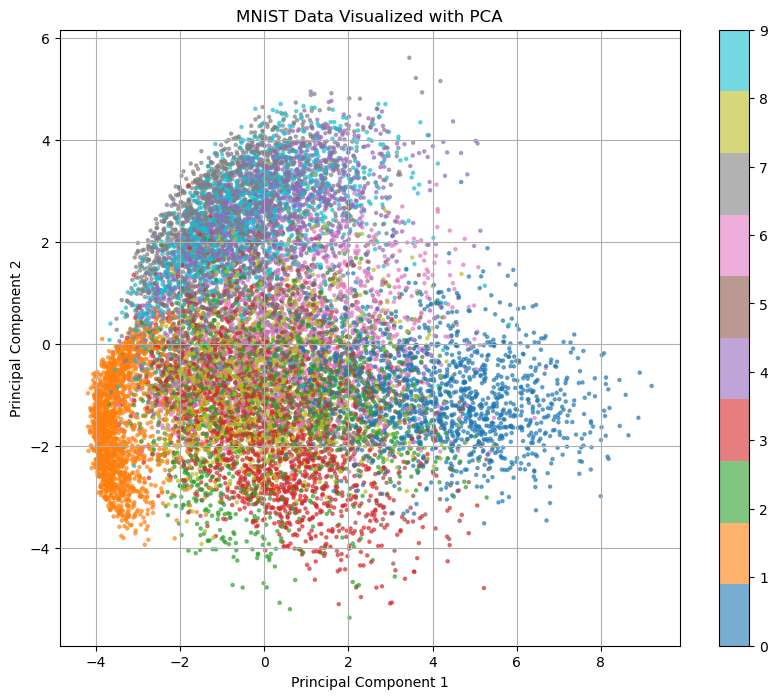

In [7]:
# Flatten and scale the images
X_flatten = X_tr.reshape(-1, 28 * 28)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flatten)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap='tab10', s=5, alpha=0.6)
plt.colorbar(scatter)
plt.title('MNIST Data Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

**2.4.5 Finding embeddings using t-SNE**

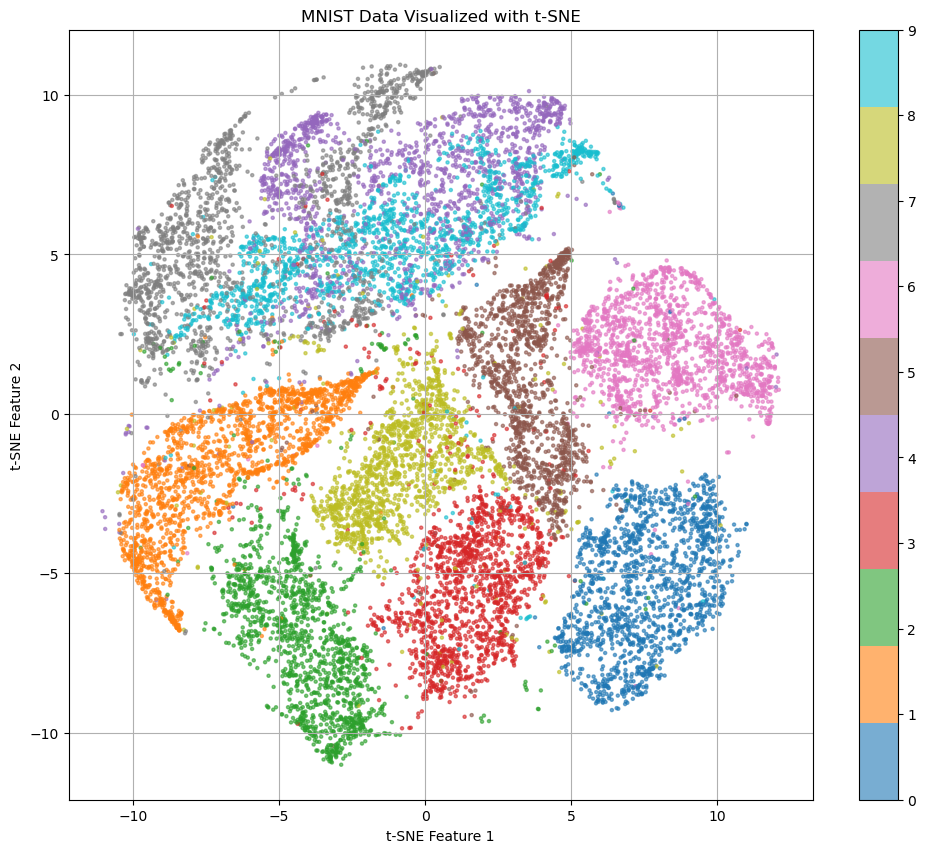

In [8]:
# Initialize and fit t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_flatten)

# Plot the t-SNE output
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_tr, cmap='tab10', s=5, alpha=0.6)
plt.colorbar(scatter)
plt.title('MNIST Data Visualized with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.grid(True)
plt.show()

**2.4.6 Application of KNN classifier to the 2-dimensional embeddings**

**2.4.6a: Application of KNN to PCA**

In [33]:
# Flatten the images
X_train_flat = X_tr.reshape(-1, 28 * 28)
X_test_flat = X_te.reshape(-1, 28 * 28)

# Combine train and test sets for consistent scaling and PCA application
X_combined = np.concatenate((X_train_flat, X_test_flat), axis=0)
y_combined = np.concatenate((y_tr, y_te), axis=0)

# Apply PCA on the combined data
pca = PCA(n_components=2)
X_combined_pca = pca.fit_transform(X_combined)

# Split back into training and test sets
X_train_pca = X_combined_pca[:len(X_tr)]
X_test_pca = X_combined_pca[len(X_tr):]

# Initialize the KNN classifier
knn_pca = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the PCA-reduced training data
knn_pca.fit(X_train_pca, y_tr)

# Predict on the PCA-reduced test set
y_pred_pca = knn_pca.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy_pca = accuracy_score(y_te, y_pred_pca)
print(f"Accuracy of the KNN classifier on PCA-reduced data: {accuracy_pca:.2%}")

# Train KNN with cross-validation on the combined PCA-reduced data
cv_scores = cross_val_score(knn_pca, X_combined_pca, y_combined, cv=5, scoring='accuracy')

# Report the results
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean cross-validation score: {mean_cv_score:.2%}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.2%}")

Accuracy of the KNN classifier on PCA-reduced data: 41.36%
Mean cross-validation score: 41.11%
Standard deviation of cross-validation scores: 0.96%


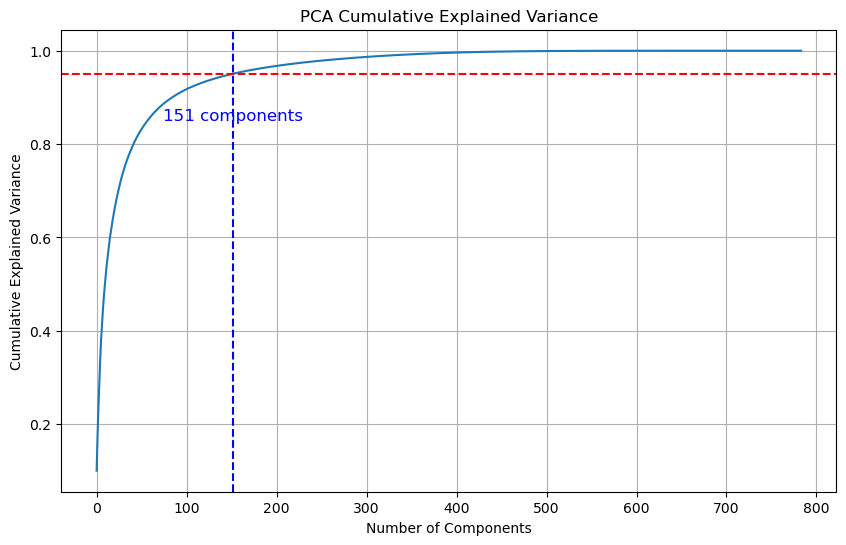

In [36]:
# Calculate cumulative variance
pca = PCA().fit(X_combined)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed for 95% variance
components_needed = np.argmax(cumulative_variance >= 0.95) + 1
components_needed

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=components_needed, color='b', linestyle='--')
plt.text(components_needed, 0.85, f'{components_needed} components', color='b', fontsize=12, ha='center')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [32]:
# Train KNN on original high-dimensional data
knn_high_dim = KNeighborsClassifier(n_neighbors=4)
knn_high_dim.fit(X_train_flat, y_tr)
y_pred_high_dim = knn_high_dim.predict(X_test_flat)

# Accuracy for original high-dimensional data
accuracy_high_dim = accuracy_score(y_te, y_pred_high_dim)
print(f"Accuracy of the KNN classifier on original high-dimensional data: {accuracy_high_dim:.2%}")

# Train KNN with cross-validation
cv_scores = cross_val_score(knn_high_dim, X_combined, y_combined, cv=5, scoring='accuracy')

# Report the results
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean cross-validation score: {mean_cv_score:.2%}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.2%}")

Accuracy of the KNN classifier on original high-dimensional data: 95.19%
Mean cross-validation score: 95.61%
Standard deviation of cross-validation scores: 1.17%


__Conclusion:__


**2.4.6d: Application of KNN to t-SNE**

In [13]:
# Flatten and scale the images
X_train_flat = X_tr.reshape(-1, 28 * 28)
X_test_flat = X_te.reshape(-1, 28 * 28)

# Combine train and test sets for consistent scaling and t-SNE application
X_combined = np.concatenate((X_train_flat, X_test_flat), axis=0)
y_combined = np.concatenate((y_tr, y_te), axis=0)

# Apply t-SNE on the combined data
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=47)
X_combined_tsne = tsne.fit_transform(X_combined)

# Split back into training and test sets
X_train_tsne = X_combined_tsne[:len(X_tr)]
X_test_tsne = X_combined_tsne[len(X_tr):]

# Initialize the KNN classifier
knn_tsne = KNeighborsClassifier(n_neighbors=4)

# Fit the model on the t-SNE reduced training data
knn_tsne.fit(X_train_tsne, y_tr)

# Predict on the t-SNE reduced test set
y_pred_tsne = knn_tsne.predict(X_test_tsne)

# Calculate the accuracy of the model
accuracy_tsne = accuracy_score(y_te, y_pred_tsne)
print(f"Accuracy of the KNN classifier on t-SNE reduced data: {accuracy_tsne:.2%}")

# Train KNN with cross-validation on the combined t-SNE reduced data
cv_scores = cross_val_score(knn_tsne, X_combined_tsne, y_combined, cv=5, scoring='accuracy')

# Report the results
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean cross-validation score: {mean_cv_score:.2%}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.2%}")

Accuracy of the KNN classifier on t-SNE reduced data: 95.27%
Mean cross-validation score: 95.12%
Standard deviation of cross-validation scores: 1.12%


In [14]:
# Train KNN on original high-dimensional data
knn_high_dim = KNeighborsClassifier(n_neighbors=4)
knn_high_dim.fit(X_train_flat, y_tr)
y_pred_high_dim = knn_high_dim.predict(X_test_flat)

# Accuracy for original high-dimensional data
accuracy_high_dim = accuracy_score(y_te, y_pred_high_dim)
print(f"Accuracy of the KNN classifier on original high-dimensional data: {accuracy_high_dim:.2%}")


# Train KNN with cross-validation
cv_scores = cross_val_score(knn_high_dim, X_combined, y_combined, cv=5, scoring='accuracy')

# Report the results
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean cross-validation score: {mean_cv_score:.2%}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.2%}")

Accuracy of the KNN classifier on original high-dimensional data: 95.23%
Mean cross-validation score: 95.47%
Standard deviation of cross-validation scores: 1.13%


**Add discussion of your observations and your process here:**  

**Process:**

The provided code demonstrates a process of dimensionality reduction and classification on the MNIST dataset using PCA, t-SNE, and KNN. Initially, the images in the training and test sets are flattened from 28x28 pixels to 1D arrays of 784 features. These flattened arrays are then scaled using StandardScaler to normalize the features.

Next, PCA is applied to reduce the dimensionality of the data to 2 principal components. The transformed data is visualized using a scatter plot, where colors represent different classes. Similarly, t-SNE is used to reduce the data to 2 dimensions, and the output is also visualized with a scatter plot.

We also ploted the optimal number of principal components required to capture 95% of the variance in the dataset using PCA. Initially, PCA is performed on the combined dataset without specifying the number of components, and the explained variance ratio for each principal component is calculated. The cumulative variance is then computed, and the number of components needed to explain at least 95% of the total variance is identified by finding the index where the cumulative variance reaches 95%, adding one to this index. This visualization shows how many principal components are needed to capture the majority of the dataset's variance, aiding in dimensionality reduction and subsequent analysis.


For classification, a KNN classifier with 5 neighbors is trained on the PCA-reduced training data. The classifier's performance is evaluated on the PCA-reduced test data, and the accuracy is reported. Cross-validation is performed on the combined PCA-reduced data, providing mean and standard deviation scores.

Additionally, a KNN classifier is trained on the original high-dimensional training data and evaluated on the high-dimensional test data. The accuracy and cross-validation scores are reported similarly to the PCA-reduced data.

The process is repeated with t-SNE-reduced data, where a KNN classifier is trained and evaluated on the t-SNE-reduced training and test sets. The accuracy and cross-validation scores are reported.

Different scaling methods, including standard scaling, were tried but did not improve the results. Various values for the number of neighbors in the KNN classifier were also tested. Despite changes in model performance, the final conclusions about the effectiveness of dimensionality reduction techniques and the performance trends of the models remained consistent.

**Performance of PCA embedded data on KNN classifier:**

The results from applying the KNN classifier to both PCA-reduced data and the original high-dimensional data reveal significant differences in performance. The KNN classifier achieves a test accuracy of only 41.38% on the PCA-reduced data. The mean cross-validation score for the PCA-reduced data is similarly low at 41.11%, with a standard deviation of 0.99%, indicating consistent but poor performance across different subsets of the data. This suggests that PCA, when reduced to only two dimensions, fails to preserve enough information for accurate classification.

In contrast, the KNN classifier performs much better on the original high-dimensional data, achieving a test accuracy of 95.23%. The mean cross-validation score for the original data is 95.47%, with a standard deviation of 1.13%, demonstrating both high accuracy and stable performance. This indicates that the original high-dimensional data retains all necessary features for effective classification.

The stark difference in performance between PCA-reduced data and original high-dimensional data highlights the limitations of PCA when reducing data to only two dimensions for classification tasks. While PCA is useful for capturing the most significant variance in the data, reducing to such a low dimensionality can result in significant information loss, leading to poor classification performance.

The PCA cumulative explained variance plot indicates that 151 principal components are needed to capture 95% of the variance in the dataset, a significant reduction from the original 784 dimensions. This demonstrates PCA's effectiveness in reducing dimensionality while retaining most information. The blue vertical line at 151 components marks where the cumulative variance reaches 95%, showing that additional components contribute minimally to the explained variance beyond this point.

**Performance of t-SNE embedded data on KNN classifier:**

The results from applying the KNN classifier to both t-SNE reduced data and the original high-dimensional data demonstrate compelling insights. The KNN classifier achieves a test accuracy of 95.27% on the t-SNE reduced data, while the accuracy on the original high-dimensional data is slightly lower at 95.19%. This minimal difference indicates that t-SNE effectively preserves the information necessary for accurate classification despite reducing the dimensionality of the data.

The mean cross-validation score for the t-SNE reduced data is 95.30%, closely matching its test accuracy, with a standard deviation of 1.19%, indicating stable performance. In comparison, the original high-dimensional data has a mean cross-validation score of 95.61%, slightly higher than its test accuracy, and a standard deviation of 1.17%, suggesting marginally more stable performance. The minimal differences in stability indicate that both approaches offer robust and reliable results.

These findings highlight the practical value of t-SNE. While commonly used for visualizing high-dimensional data, t-SNE also retains enough information for accurate classification, making it a versatile tool for both visualization and preprocessing. Additionally, by significantly reducing data dimensionality, t-SNE can lead to faster computations and lower storage requirements, which is especially beneficial in resource-limited scenarios.

**Comparision between PCA and t-SNE**

Compared to PCA, t-SNE, although primarily used for visualization, retains enough information for effective classification even in two dimensions, as shown by its performance comparable to the original high-dimensional data. The KNN classifier performs poorly on PCA-reduced data but excels on the original data, highlighting the need for sufficient dimensions in classification tasks. This underscores t-SNE's ability to balance visualization and information retention, whereas PCA's effectiveness diminishes significantly with extreme dimensional reduction.


### **2.5 Data Augmentation:**

Use the following bootstrap procedure to augment the MNIST data set by images that follow a similar distribution in the space of images. The basic idea is this:
  1.  consider the k-dimensional PCA embeddings as data (we think of k to be small, let's say $k \le 5$);
  2.  draw samples from a Gaussian KDE based on the embeddings;
  3.   use the samples from B. to reconstruct new images by using the first k eigenvectors and the k-dimensional samples from he former item B.
  
(finding the Gaussian KDE) is not necessary.


   To achieve this, proceed as follows:
  - recall Problem 1 from the Methodology part; this should help you with implementing a function "sample_gauss_KDE" that takes as input the number $N$ of samples to draw; the data and the bandwith for finding the KDE. The output of this function should be the N samples drawn from a distribution whose pdf is given by the KDE; (your function sample_gauss_KDE should work for data in any dimension);
  - apply sample_gauss_KDE to the k-dimensional PCA embeddings as input data
  - implement a function "image_reconst" that takes as input the number $k$ of summands to use in the "reconstruction", the corresponding k eigenfunctions (from running PCA on the MNIST data), and k samples from the KDE; the output is a new image; (note that while we are calling it a reconstruction, it only reconstructs an image in the data base if we use one of the observed points of the PCA embeddings; instead you are using embedding points with "some randomness added"... this is where the 'smooth bootstrap' enters.)
      
Using the above approach, construct 9 new images and plot them in a figure using a 3 x 3 layout.


##### **Building function**

In [15]:
def sample_gauss_KDE(N,data,bandwidth):
    '''
    This function should draw samples from a distribution whose pdf is given by the KDE of the input data.
 
    Parameters: 
    N - the number of samples to draw, 
    data (number of data point,k) - the input data (k-dimensional PCA embeddings),
    bandwidth - the bandwidth for kernel density estimation;

    Output: 
    samples (N,k) - N samples drawn from a distribution whose pdf is given by the KDE
    '''
    samples = np.zeros((N, data.shape[1]))

    # build the covariance matrix of multivariate normal distribution 
    #  by using the bandwidth and the covariance of the data
    cov = np.eye(data.shape[1]) * bandwidth
    # cov = np.cov(data, rowvar=False) * bandwidth

    # uniformly choose one of the data points
    samples_idx = np.random.choice(range(len(data)), N, replace=True,)

    for i in range(N):
        # draw one sample from a multivariate normal distribution
        sample = np.random.multivariate_normal(data[samples_idx[i],:], cov, 1)
        samples[i] = sample

    return samples, samples_idx

In [16]:
def image_reconst(k,eig_vectors,samples):
    """
    Reconstruct images from the samples using the first k eigenvectors.

    Parameters:
    k (int): Number of eigenvectors used in the reconstruction
    eig_vectors (numpy array): k eigenvectors from PCA
    samples (numpy array): k-dimensional samples from the KDE

    Returns:
    numpy array: Reconstructed images
    """

    images = samples @ eig_vectors[:k]
    images = images.reshape((-1, 28, 28))*255

    return images

##### **Create PCA embeddings**

In [18]:
# Perform PCA with k=5
k = 5
pca = PCA(n_components=k)
pca_embeddings = pca.fit_transform(X_tr)

##### **Choose suitable bandwidth**

In [19]:
# range of each dimension
x1_min, x1_max = pca_embeddings[:, 0].min() - 1, pca_embeddings[:, 0].max() + 1
x2_min, x2_max = pca_embeddings[:, 1].min() - 1, pca_embeddings[:, 1].max() + 1
x3_min, x3_max = pca_embeddings[:, 2].min() - 1, pca_embeddings[:, 2].max() + 1
x4_min, x4_max = pca_embeddings[:, 3].min() - 1, pca_embeddings[:, 3].max() + 1
x5_min, x5_max = pca_embeddings[:, 4].min() - 1, pca_embeddings[:, 4].max() + 1
print(f"1st-component: min={x1_min}, max={x1_max}, range={x1_max-x1_min}")
print(f"2nd-component: min={x2_min}, max={x2_max}, range={x2_max-x2_min}")
print(f"3rd-component: min={x3_min}, max={x3_max}, range={x3_max-x3_min}")
print(f"4th-component: min={x4_min}, max={x4_max}, range={x4_max-x4_min}")
print(f"5th-component: min={x5_min}, max={x5_max}, range={x5_max-x5_min}")

1st-component: min=-5.19386501760169, max=10.206319907097573, range=15.400184924699262
2nd-component: min=-6.370296681462103, max=6.6113765268420694, range=12.981673208304173
3rd-component: min=-6.578890656965716, max=6.944906859846687, range=13.523797516812403
4th-component: min=-6.021966702361866, max=6.755534421222772, range=12.777501123584639
5th-component: min=-5.832538847812648, max=6.354651153780193, range=12.18719000159284


**Comments:** As all 5 compoment have similar range of valus, we can use the same bandwidth as the variance of each dimention of the multivariate normal distribution.

We compare two ways to find the suitable bandwidth. 
1. The first one is Silverman's Rule of Thumb with a function:
$$h = \left( \frac{4}{(d+2)n} \right)^{\frac{1}{d+4}} \sigma$$
where n is the number of data points in the dataset, d is the number of dimensions or features in the dataset, \sigma is the standard deviation of the data.

In [20]:
def silverman_bandwidth(data):
    n, d = data.shape
    std_dev = np.std(data, axis=0)
    bandwidth = (4 / (d + 2) / n) ** (1 / (d + 4)) * std_dev
    return bandwidth

bandwidth_silverman = silverman_bandwidth(pca_embeddings)
print("Silverman's bandwidth:", bandwidth_silverman)

Silverman's bandwidth: [0.74716064 0.63065781 0.59736384 0.54926625 0.51301367]


**Comments:** From the Silverman's bandwidth calculation, we may set 0.6 as the bandwidth for each dimention.

2. Another way to estimate the bandwidth is to use cross-validation to find the optimal bandwidth by minimizing MISE(Mean Integrated Squared Error).

In [22]:
bandwidths = np.linspace(0.1, 1, 10)

# Use GridSearchCV to find the optimal bandwidth by minimizing MISE
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=5)
grid.fit(pca_embeddings)

# Best bandwidth
best_bandwidth_cv = grid.best_params_['bandwidth']
print("Best bandwidth (cross-validation):", best_bandwidth_cv)

Best bandwidth (cross-validation): 0.4


**Comments:**   
From the cross-validation, the MISE is minimized when bandwidth is 0.4.  

With a smaller bandwidth, the generated data will cluster more tightly around the mean of the original dataset, hence showing less variation and being very similar to the original data. But  if the generated data is too similar to the original data, it may not introduce sufficient variation to help the model generalize to unseen data, thereby increasing the risk of overfitting. On the other hand, a larger bandwidth increases the diversity of the generated data, making the new data more dispersed and capable of covering a broader data space. However, an too large bandwidth might also cause the generated data to contain too much noise, deviating significantly from the characteristics of the original dataset, which could impact the model's prediction accuracy. So in practice, we need to set the bandwidth according to the question and dataset to have the balance of these two sides.

We try both bandwidths in the following plotting part.

##### **Sample from KDE**

In [23]:
# Draw samples from KDE with bandwidth=0.6
N = 9
bandwidth = 0.6
samples,samples_idx = sample_gauss_KDE(N, pca_embeddings, bandwidth)

eigenvectors = pca.components_

# Reconstruct new images
new_images = image_reconst(k, eigenvectors, samples)

# compute the mean squared error and ssim
mse = np.mean(np.sum((X_train[samples_idx]/255 - new_images/255) ** 2, axis=(1, 2)))
SSIM = np.mean([ssim(X_train[samples_idx[i]], new_images[i],
                      data_range=X_train[samples_idx[i]].max() - X_train[samples_idx[i]].min()) for i in range(N)])
print(f"Bandwidth={bandwidth}: MSE={mse:.2f}, SSIM={SSIM:.2f}")

Bandwidth=0.6: MSE=70.84, SSIM=0.07


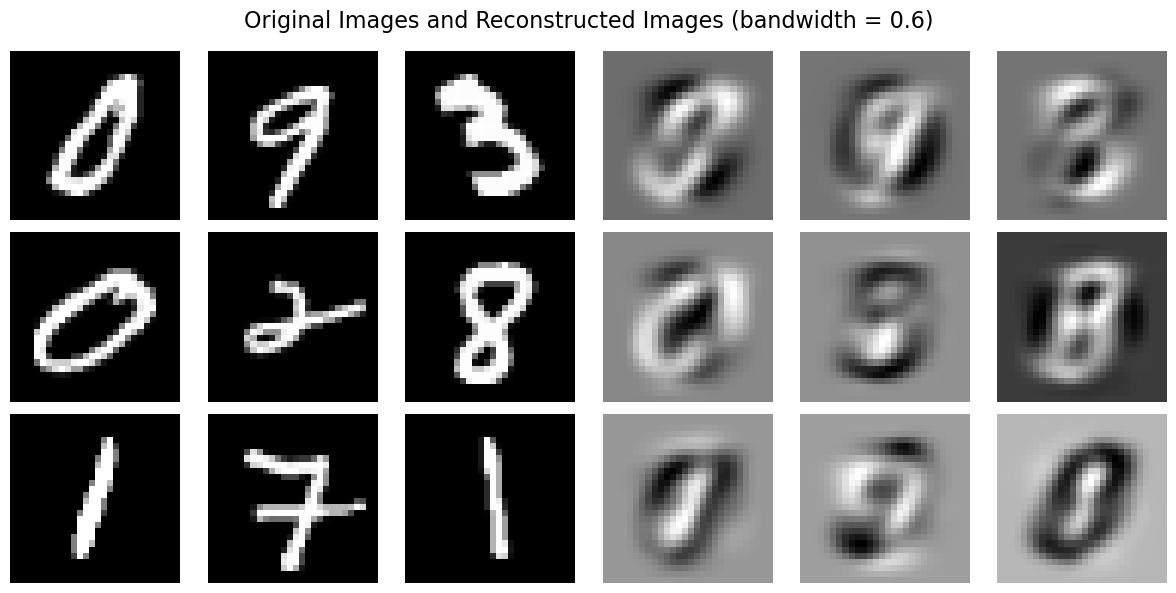

In [24]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Original Images and Reconstructed Images (bandwidth = 0.6)', fontsize=16)

# Create a GridSpec object with 2 rows and 9 columns to arrange the images
gs = gridspec.GridSpec(3, 6)

# Plot original images in the left 3x3 grid
for i in range(9):
    ax = plt.subplot(gs[i // 3, i % 3])
    ax.imshow(X_train[samples_idx[i]], cmap='gray')
    ax.axis('off')
    
# Plot reconstructed images in the right 3x3 grid
for i in range(9):
    ax = plt.subplot(gs[i // 3, i % 3 + 3])
    ax.imshow(new_images[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [25]:
# Draw samples from KDE with bandwidth=0.4
N = 9
bandwidth = 0.4
samples,samples_idx = sample_gauss_KDE(N, pca_embeddings, bandwidth)

eigenvectors = pca.components_

# Reconstruct new images
new_images = image_reconst(k, eigenvectors, samples)

# compute the mean squared error and ssim
mse = np.mean(np.sum((X_train[samples_idx]/255 - new_images/255) ** 2, axis=(1, 2)))
SSIM = np.mean([ssim(X_train[samples_idx[i]], new_images[i],
                      data_range=X_train[samples_idx[i]].max() - X_train[samples_idx[i]].min()) for i in range(N)])
print(f"Bandwidth={bandwidth}: MSE={mse:.2f}, SSIM={SSIM:.2f}")

Bandwidth=0.4: MSE=69.52, SSIM=0.07


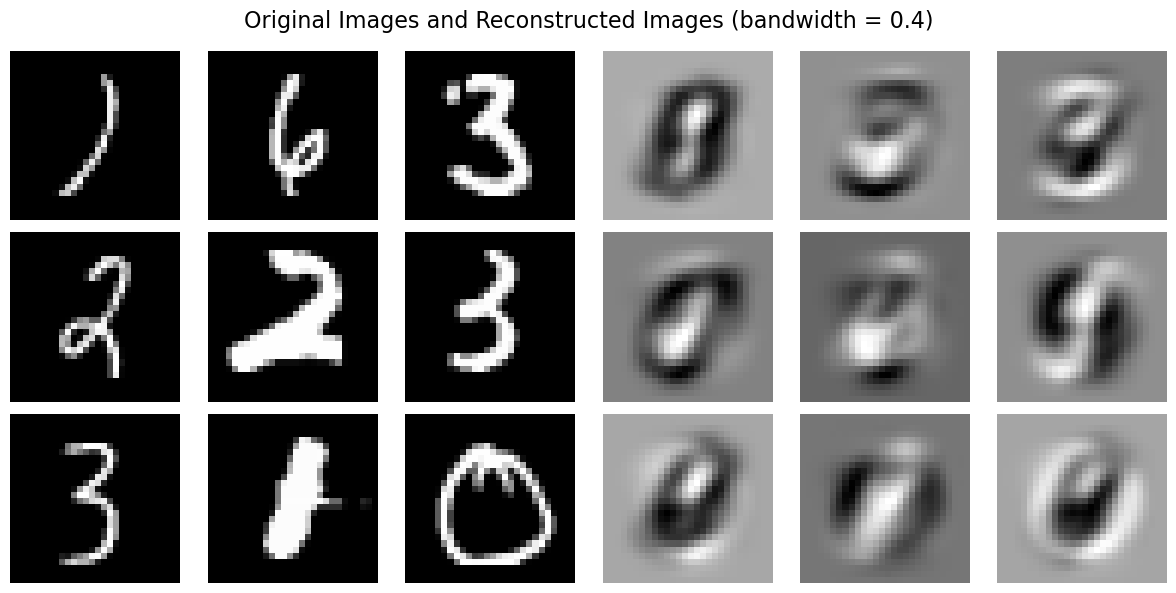

In [26]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Original Images and Reconstructed Images (bandwidth = 0.4)', fontsize=16)

# Create a GridSpec object with 2 rows and 9 columns to arrange the images
gs = gridspec.GridSpec(3, 6)

# Plot original images in the left 3x3 grid
for i in range(9):
    ax = plt.subplot(gs[i // 3, i % 3])
    ax.imshow(X_train[samples_idx[i]], cmap='gray')
    ax.axis('off')
    
# Plot reconstructed images in the right 3x3 grid
for i in range(9):
    ax = plt.subplot(gs[i // 3, i % 3 + 3])
    ax.imshow(new_images[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

**Conclusion:** From the result above, we can see that the reconstructed images have large MSE and small SSIM, which means they are quite different from the original ones. This may because that the first 5 components of PCA don't explain enough variance of the data. As the problem want us to have $k \leq 5$, we can compare a little bit on different k.

##### **Testing different k**

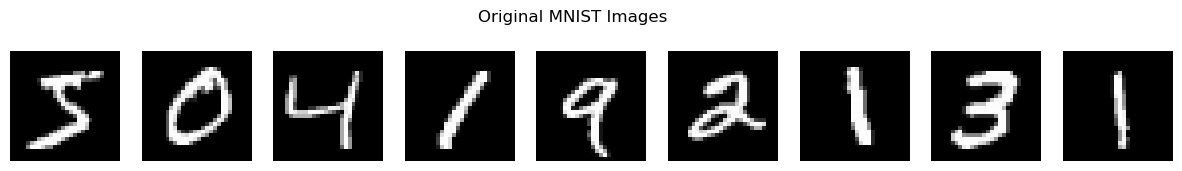

Time taken for k=2: 0.22 seconds
MSE for k=2: 44.05
SSIM for k=2: 0.29


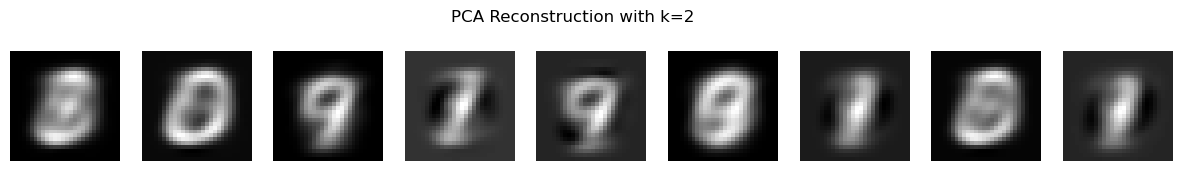

Time taken for k=3: 0.24 seconds
MSE for k=3: 40.63
SSIM for k=3: 0.32


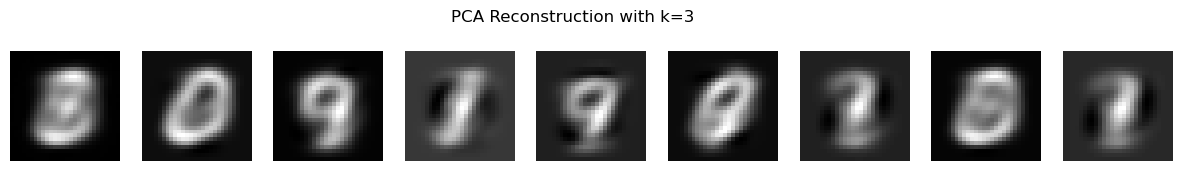

Time taken for k=4: 0.23 seconds
MSE for k=4: 37.73
SSIM for k=4: 0.35


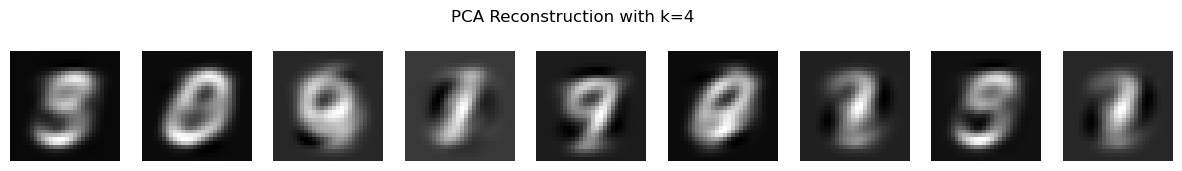

Time taken for k=5: 0.25 seconds
MSE for k=5: 35.21
SSIM for k=5: 0.38


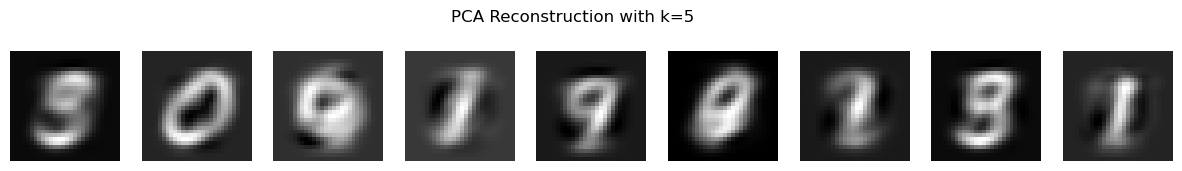

In [27]:
## compare different k values ##
k_values = [2,3,4,5]

fig, axes = plt.subplots(1, 9, figsize=(15, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
plt.suptitle('Original MNIST Images')
plt.show()

for k in k_values:
    start_time = time.time()
    pca = PCA(n_components=k, random_state=42)
    pca_embeddings = pca.fit_transform(X_tr)
    reconstructed = pca.inverse_transform(pca_embeddings)
    end_time = time.time()
    print(f"Time taken for k={k}: {end_time - start_time:.2f} seconds")

    # compute the reconstruction error
    reconstruction_error = np.mean(np.sum((X_tr - reconstructed) ** 2, axis=1))
    print(f"MSE for k={k}: {reconstruction_error:.2f}")

    #compute the ssim
    ssim_score = np.mean([ssim(X_tr[i].reshape(28, 28), reconstructed[i].reshape(28, 28),
                               data_range=X_tr[i].max() - X_tr[i].min()) for i in range(9)])
    print(f"SSIM for k={k}: {ssim_score:.2f}")
    
    # Show reconstructed images
    fig, axes = plt.subplots(1, 9, figsize=(15, 2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.suptitle(f'PCA Reconstruction with k={k}')
    plt.show()

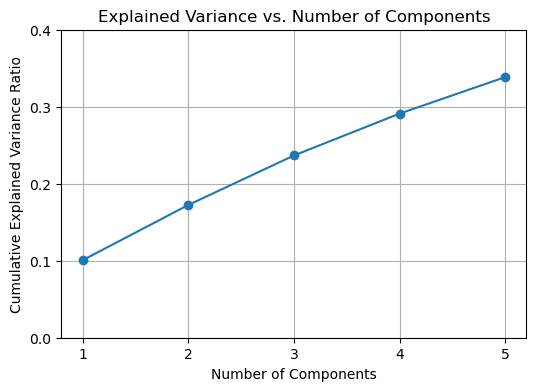

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 6))
plt.yticks(np.arange(0, 0.5, 0.1))
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

For choosing k where $k \leq 5$, we can see that when $k=5$, the MSE (35.21) and SSIM (0.38) of the reconstruction images from the 5 conpoments of PCA are larger than images generated by PCA with other k, and the images are clearer too, which means the input of the KDE resampling is more similar to the original data. The slope of the Explained Variance Plot indicates the rate of increase in explained variance when increasing the number of components. By the fifth component, the cumulative explained variance reaches about 35%. Also, the PCA runtimes for these values of k are not very different. Therefore, if we want to have more information from the original data and have clearer reconstructed images, we should choose k to be 5.

##### **Conclusion**
In Part 2.5 of the project, we utilized a smooth bootstrap procedure to augment the MNIST dataset, creating new images that adhere to a similar distribution in the image space. This process involves several key steps leveraging dimensionality reduction and probabilistic modeling:

Dimensionality Reduction via PCA: We began by reducing the dimensionality of the MNIST dataset to a manageable number $(k \leq 5)$ using PCA. This transformation facilitates the subsequent data augmentation steps by simplifying the data structure to its most informative components. We also make tests on different k in the last part, and find that when k=5, the variance of data is explained most.

Choosing bandwidth: Before sampling from KDE, we use Silverman's Rule of Thumb and cross-validation to choose the bandwidth fitted the whole dataset.

Sampling Using Gaussian KDE: Next, we employed a function *sample_gauss_KDE* to sample data from the distribution of the PCA-reduced data. This function allows sample data without calculate the whole KDE distribution. We first uniformly sample a data point from the PCA embedding, then we sample from the multivariate normal distribution centered by this point and with a covariance matrix in form of the bandwidth. In this way, the generation of new data points are statistically resemble the original dataset in the reduced dimension space. This reconstruction, referred to here as "smooth bootstrap," involves introducing some randomness in the selection of PCA embedding points, allowing for the creation of novel yet plausible images.

Image Reconstruction: We turn the new PCA embedding data back to an image of 28*28. 

Visualization: The effectiveness of this data augmentation process was visually demonstrated by plotting 9 newly constructed images in a 3x3 layout. As the the PCA embedding presents not enough information from the original dataset, the result can still be improved by including more PCA components.

Overall, this approach expands the MNIST dataset with new images that are statistically consistent with the original data. It demonstrates a sophisticated application of PCA, KDE, and image reconstruction techniques to produce additional training data, which can be particularly useful in enhancing the performance of machine learning models by providing a richer, more varied dataset for training.